## Task 3: Customer Segmentation/Clustering
#### Approach:
##### 1. Clustering Features:
>1.Use customer profile and transaction data for clustering.
>
>2.Select features like TotalValue, Quantity, and Region.

#### 2. Algorithm:
>1.Use K-Means or Hierarchical Clustering.
>
>2.Evaluate clusters using the Davies-Bouldin (DB) Index.

#### 3.Visualization:
 > Plot clusters in 2D/3D space using PCA or t-SNE.

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
combined_data = pd.read_csv('KishoreReddy_V_Combined_Data.csv')

In [18]:
# Feature matrix: Customer profile + transaction data
customer_features = combined_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first'
}).reset_index()

# One-hot encode categorical data
encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_features[['Region']]).toarray()

# Normalize numerical data
scaler = StandardScaler()
numerical_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])

In [21]:
# Prepare clustering data
features = np.hstack((numerical_features, region_encoded))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

# Calculate DB Index
db_index = davies_bouldin_score(features, clusters)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.4451410863711218


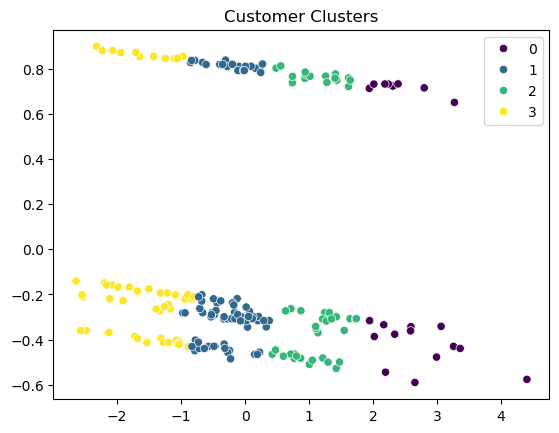

In [22]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Clusters')
plt.show()